In [34]:
import os

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [35]:
df1 = pd.read_csv("google_search_data.csv")
df2 = pd.read_csv("product_manufacturer_list.csv")
df3 = pd.read_csv("sales_data.csv")
df4 = pd.read_csv("social_media_data.csv")
df5 = pd.read_csv("Theme_list.csv")
df6= pd.read_csv("Theme_product_list.csv")

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          181565 non-null  object
 1   platform      181565 non-null  object
 2   searchVolume  181565 non-null  int64 
 3   Claim_ID      181565 non-null  int64 
 4   week_number   181565 non-null  int64 
 5   year_new      181565 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ MB


In [37]:
df2

,PRODUCT_ID,Vendor,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,Others,NaN,NaN,NaN,NaN,NaN
1,2,Others,NaN,NaN,NaN,NaN,NaN
2,3,Others,NaN,NaN,NaN,NaN,NaN
3,4,Others,NaN,NaN,NaN,NaN,NaN
4,5,Others,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
67170,67171,Private Label,NaN,NaN,NaN,NaN,NaN
67171,67172,Private Label,NaN,NaN,NaN,NaN,NaN
67172,67173,Private Label,NaN,NaN,NaN,NaN,NaN
67173,67174,Private Label,NaN,NaN,NaN,NaN,NaN


In [38]:
df3

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164
...,...,...,...,...,...
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361


In [39]:
df4

,Theme Id,published_date,total_post
0,148.0,10-01-2015,76
1,148.0,10-10-2015,31
2,148.0,10-11-2015,65
3,148.0,10-12-2015,88
4,148.0,10/13/2015,85
...,...,...,...
533385,876.0,09-05-2019,4658
533386,876.0,09-06-2019,3731
533387,876.0,09-07-2019,2336
533388,876.0,09-08-2019,1374


In [40]:
df5

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla
...,...,...
203,508,cola
204,769,shortbread
205,949,passion fruit
206,521,blood orange


In [41]:
df5

,CLAIM_ID,Claim Name
0,0,No Claim
1,8,low carb
2,15,beans
3,16,cocoa
4,26,vanilla
...,...,...
203,508,cola
204,769,shortbread
205,949,passion fruit
206,521,blood orange


In [42]:
df6

,PRODUCT_ID,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227
...,...,...
91480,8158,0
91481,45183,0
91482,25690,0
91483,46085,0


In [43]:
df1['date'] = pd.to_datetime(df1['date'],errors='coerce')

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          181565 non-null  datetime64[ns]
 1   platform      181565 non-null  object        
 2   searchVolume  181565 non-null  int64         
 3   Claim_ID      181565 non-null  int64         
 4   week_number   181565 non-null  int64         
 5   year_new      181565 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 8.3+ MB


In [45]:
t1 = df1.sort_values(by = ['date','Claim_ID'])
temp1 = pd.DataFrame(t1.groupby(['date','Claim_ID'])['searchVolume'].sum().reset_index())

In [46]:
temp1

,date,Claim_ID,searchVolume
0,2014-01-01,8,6613
1,2014-01-01,39,181
2,2014-01-01,75,135
3,2014-01-01,81,1257
4,2014-01-01,100,2636
...,...,...,...
138482,2019-12-09,964,48090
138483,2019-12-09,967,7712
138484,2019-12-09,974,23176
138485,2019-12-09,980,56140


In [47]:
#temp1 = temp1[temp1['Claim_ID'] == 980 ][['date','searchVolume']]
#sns.lineplot(x = 'date', y ='searchVolume',data = temp1[(temp1['date'].dt.year == 2016)].groupby(temp1['date'].dt.month).sum().reset_index())

In [48]:
new_data = df3[:]

In [49]:
new_data

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927.0,934,18680
1,20160109,3,10289.0,1592,28646
2,20160109,4,357.0,22,440
3,20160109,6,23113.0,2027,81088
4,20160109,7,23177.0,3231,58164
...,...,...,...,...,...
4526177,20181027,47536,8.0,2,3
4526178,20181027,47539,391.0,39,68
4526179,20181027,47543,105.0,59,48
4526180,20181027,47544,3720.0,1246,4361


In [50]:
new_data['system_calendar_key_N'] =  pd.to_datetime(new_data['system_calendar_key_N'], format = '%Y%m%d')

In [51]:
map1 = dict(zip(df6['PRODUCT_ID'],df6['CLAIM_ID']))

In [52]:
new_data['CLAIM_ID'] = new_data['product_id'].map(map1)

In [53]:
new_data

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
0,2016-01-09,1,13927.0,934,18680,0
1,2016-01-09,3,10289.0,1592,28646,0
2,2016-01-09,4,357.0,22,440,0
3,2016-01-09,6,23113.0,2027,81088,0
4,2016-01-09,7,23177.0,3231,58164,0
...,...,...,...,...,...,...
4526177,2018-10-27,47536,8.0,2,3,0
4526178,2018-10-27,47539,391.0,39,68,0
4526179,2018-10-27,47543,105.0,59,48,8
4526180,2018-10-27,47544,3720.0,1246,4361,0


In [54]:
new_data['system_calendar_key_N'] = pd.to_datetime(new_data['system_calendar_key_N'],errors='coerce')

In [55]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526182 entries, 0 to 4526181
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   system_calendar_key_N  datetime64[ns]
 1   product_id             int64         
 2   sales_dollars_value    float64       
 3   sales_units_value      int64         
 4   sales_lbs_value        int64         
 5   CLAIM_ID               int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 207.2 MB


In [56]:
t2 = new_data.sort_values(by = ['system_calendar_key_N','CLAIM_ID'])
temp2 = pd.DataFrame(t2.groupby(['system_calendar_key_N','CLAIM_ID'])['sales_units_value'].sum().reset_index())

In [57]:
temp2

,system_calendar_key_N,CLAIM_ID,sales_units_value
0,2016-01-09,0,105217303
1,2016-01-09,8,5638209
2,2016-01-09,15,8662
3,2016-01-09,16,14728
4,2016-01-09,32,2285899
...,...,...,...
8073,2019-10-05,430,2030961
8074,2019-10-05,432,2298946
8075,2019-10-05,433,34845
8076,2019-10-05,437,8717


In [58]:
#temp2 = temp2[temp2['CLAIM_ID'] == 8][['system_calendar_key_N','sales_units_value']]
#sns.lineplot(x = 'system_calendar_key_N', y ='sales_units_value',data = temp2[(temp2['system_calendar_key_N'].dt.year == 2016)].groupby(temp2['system_calendar_key_N'].dt.month).sum().reset_index())

In [59]:
t2

,system_calendar_key_N,product_id,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
0,2016-01-09,1,13927.0,934,18680,0
1,2016-01-09,3,10289.0,1592,28646,0
2,2016-01-09,4,357.0,22,440,0
3,2016-01-09,6,23113.0,2027,81088,0
4,2016-01-09,7,23177.0,3231,58164,0
...,...,...,...,...,...,...
4520340,2019-10-05,50268,7721.0,240,3840,438
4522002,2019-10-05,54842,2938.0,14,115,438
4522158,2019-10-05,55590,2296.0,26,572,438
4522168,2019-10-05,55600,1281.0,46,38,438


In [60]:
new_frame = df4[:]

In [61]:
new_frame

,Theme Id,published_date,total_post
0,148.0,10-01-2015,76
1,148.0,10-10-2015,31
2,148.0,10-11-2015,65
3,148.0,10-12-2015,88
4,148.0,10/13/2015,85
...,...,...,...
533385,876.0,09-05-2019,4658
533386,876.0,09-06-2019,3731
533387,876.0,09-07-2019,2336
533388,876.0,09-08-2019,1374


In [62]:
new_frame['published_date'] = pd.to_datetime(new_frame['published_date'],errors='coerce')

In [63]:
var3 = new_frame.sort_values(by = ['published_date','Theme Id'])
temp3 = pd.DataFrame(var3.groupby(['published_date','Theme Id'])['total_post'].sum().reset_index())

In [64]:
temp3

,published_date,Theme Id,total_post
0,2015-05-21,8.0,104
1,2015-05-21,15.0,0
2,2015-05-21,26.0,0
3,2015-05-21,38.0,0
4,2015-05-21,39.0,0
...,...,...,...
311678,2019-10-31,982.0,3
311679,2019-10-31,983.0,131
311680,2019-10-31,984.0,28
311681,2019-10-31,985.0,2


In [65]:
#temp3 = temp3[temp3['Theme Id'] == 8.0][['published_date','total_post']]
#sns.lineplot(x = 'published_date', y ='total_post',data = temp3[(temp3['published_date'].dt.year == 2016)].groupby(temp3['published_date'].dt.month).sum().reset_index())

C:\Users\ATUL~1.GUP\AppData\Local\Temp/ipykernel_11056/3450899779.py:10: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(2)


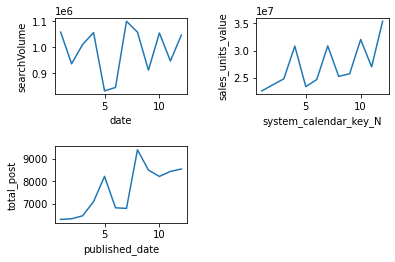

In [66]:
plt.subplot(2,2,1)
temp1 = temp1[temp1['Claim_ID'] == 980 ][['date','searchVolume']]
sns.lineplot(x = 'date', y ='searchVolume',data = temp1[(temp1['date'].dt.year == 2016)].groupby(temp1['date'].dt.month).sum().reset_index())
plt.subplot(2,2,2)
temp2 = temp2[temp2['CLAIM_ID'] == 8][['system_calendar_key_N','sales_units_value']]
sns.lineplot(x = 'system_calendar_key_N', y ='sales_units_value',data = temp2[(temp2['system_calendar_key_N'].dt.year == 2016)].groupby(temp2['system_calendar_key_N'].dt.month).sum().reset_index())
plt.subplot(2,2,3)
temp3 = temp3[temp3['Theme Id'] == 8.0][['published_date','total_post']]
sns.lineplot(x = 'published_date', y ='total_post',data = temp3[(temp3['published_date'].dt.year == 2016)].groupby(temp3['published_date'].dt.month).sum().reset_index())
plt.tight_layout(2)
plt.show()